In [7]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
import statsmodels.discrete.discrete_model as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [8]:
#load data
data = pd.read_csv('test_kinetic.csv')
data.describe()


,label,timestamp,waist_conf,waist_tx,waist_ty,waist_tz,waist_rx,waist_ry,waist_rz,chest_conf,...,foreArm_R_rx,foreArm_R_ry,foreArm_R_rz,hand_R_conf,hand_R_tx,hand_R_ty,hand_R_tz,hand_R_rx,hand_R_ry,hand_R_rz
count,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,...,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000,1289.000000
mean,0.317300,3.819731,0.839038,-2.458330,-1.218825,-158.833011,-1.222410,-20.683891,2.953089,0.606982,...,-1.582686,17.727577,-19.778802,0.626680,-22.742314,-0.000003,-0.000017,0.072287,2.286816,-10.933336
std,0.465606,2.479205,0.189019,33.356826,17.323914,41.069366,2.696419,27.603950,2.798816,0.282777,...,19.288426,25.043974,64.376565,0.326502,3.635652,0.000006,0.000019,27.545211,33.299363,48.426784
min,0.000000,0.000000,0.000000,-65.576660,-43.154040,-279.776280,-6.828950,-90.266120,-5.432320,0.000000,...,-63.785140,-74.319000,-179.454390,0.000000,-31.179120,-0.000010,-0.000050,-79.967120,-168.879070,-177.742020
25%,0.000000,1.766670,0.730000,-32.951200,0.517110,-155.371780,-2.926970,-40.215970,1.175000,0.410000,...,-7.796560,4.971700,-49.445280,0.300000,-25.809950,-0.000010,-0.000010,-16.245410,-8.890790,-23.092780
50%,0.000000,3.566670,0.930000,3.941060,7.499080,-143.846590,-1.155180,-22.125180,2.357240,0.560000,...,-0.149450,14.011840,-0.208880,0.800000,-22.004270,0.000000,-0.000010,2.342930,-0.740660,0.194500
75%,1.000000,5.533330,0.990000,16.965350,10.143290,-137.562030,0.489510,-2.087020,4.246260,0.950000,...,7.387090,29.011750,8.988940,0.800000,-20.692320,0.000000,0.000000,15.683190,14.504160,12.455010
max,1.000000,10.433330,1.000000,60.755300,15.754580,-112.284060,10.412660,105.025280,15.782880,1.000000,...,75.570950,138.233550,179.183260,1.000000,-4.762940,0.000010,0.000000,88.821470,176.803540,176.315550


In [9]:
#All

X = data[['chest_ty', 'chest_rx', 'chest_rz', 'upperLeg_L_tx', 'upperLeg_L_tz','upperLeg_R_tz', 'foot_R_ty', 'foreArm_L_tx']]
y = data[['label']]

scores = []
cv = KFold(n_splits = 10, random_state = 42, shuffle = False)
for train_index, test_index in cv.split(X):
    #print('Train Index:', train_index, '\n')
    #print('Test Index:', test_index)
    
    X_train, X_test, y_train, y_test = X.iloc[train_index.tolist()], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    my_model = LogisticRegression().fit(X_train, y_train)
    scores.append(my_model.score(X_test, y_test))

r_square = np.mean(scores)
adj_r = 1-(1-r_square)*(len(y)-1)/(len(y)-X.shape[1]-1)

print('R Square:', r_square, '\n')
print('Adjusted R Square:', adj_r, '\n')


R Square: 0.6611010174418605 

Adjusted R Square: 0.6589828988008721 



/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:43

In [68]:
test = data[['label','waist_tx','waist_ty','waist_tz','waist_rx','waist_ry','waist_rz','chest_tx','chest_ty','chest_tz','chest_rx','chest_ry','chest_rz','upperLeg_L_tx','upperLeg_L_ty','upperLeg_L_tz','upperLeg_L_rx','upperLeg_L_ry','upperLeg_L_rz','lowerLeg_L_tx','lowerLeg_L_ty','lowerLeg_L_tz','lowerLeg_L_rx','lowerLeg_L_ry','lowerLeg_L_rz','foot_L_tx','foot_L_ty','foot_L_tz','foot_L_rx','foot_L_ry','foot_L_rz','upperLeg_R_tx','upperLeg_R_ty','upperLeg_R_tz','upperLeg_R_rx','upperLeg_R_ry','upperLeg_R_rz','lowerLeg_R_tx','lowerLeg_R_ty','lowerLeg_R_tz','lowerLeg_R_rx','lowerLeg_R_ry','lowerLeg_R_rz','foot_R_tx','foot_R_ty','foot_R_tz','foot_R_rx','foot_R_ry','foot_R_rz','upperArm_L_tx','upperArm_L_ty','upperArm_L_tz','upperArm_L_rx','upperArm_L_ry','upperArm_L_rz','foreArm_L_tx','foreArm_L_ty','foreArm_L_tz','foreArm_L_rx','foreArm_L_ry','foreArm_L_rz','hand_L_tx','hand_L_ty','hand_L_tz','hand_L_rx','hand_L_ry','hand_L_rz','upperArm_R_tx','upperArm_R_ty','upperArm_R_tz','upperArm_R_rx','upperArm_R_ry','upperArm_R_rz','foreArm_R_tx','foreArm_R_ty','foreArm_R_tz','foreArm_R_rx','foreArm_R_ry','foreArm_R_rz','hand_R_tx','hand_R_ty','hand_R_tz','hand_R_rx','hand_R_ry','hand_R_rz']]
test = test.dropna()

X = test[['waist_tx','waist_ty','waist_tz','waist_rx','waist_ry','waist_rz','chest_tx','chest_ty','chest_tz','chest_rx','chest_ry','chest_rz','upperLeg_L_tx','upperLeg_L_ty','upperLeg_L_tz','upperLeg_L_rx','upperLeg_L_ry','upperLeg_L_rz','lowerLeg_L_tx','lowerLeg_L_ty','lowerLeg_L_tz','lowerLeg_L_rx','lowerLeg_L_ry','lowerLeg_L_rz','foot_L_tx','foot_L_ty','foot_L_tz','foot_L_rx','foot_L_ry','foot_L_rz','upperLeg_R_tx','upperLeg_R_ty','upperLeg_R_tz','upperLeg_R_rx','upperLeg_R_ry','upperLeg_R_rz','lowerLeg_R_tx','lowerLeg_R_ty','lowerLeg_R_tz','lowerLeg_R_rx','lowerLeg_R_ry','lowerLeg_R_rz','foot_R_tx','foot_R_ty','foot_R_tz','foot_R_rx','foot_R_ry','foot_R_rz','upperArm_L_tx','upperArm_L_ty','upperArm_L_tz','upperArm_L_rx','upperArm_L_ry','upperArm_L_rz','foreArm_L_tx','foreArm_L_ty','foreArm_L_tz','foreArm_L_rx','foreArm_L_ry','foreArm_L_rz','hand_L_tx','hand_L_ty','hand_L_tz','hand_L_rx','hand_L_ry','hand_L_rz','upperArm_R_tx','upperArm_R_ty','upperArm_R_tz','upperArm_R_rx','upperArm_R_ry','upperArm_R_rz','foreArm_R_tx','foreArm_R_ty','foreArm_R_tz','foreArm_R_rx','foreArm_R_ry','foreArm_R_rz','hand_R_tx','hand_R_ty','hand_R_tz','hand_R_rx','hand_R_ry','hand_R_rz']]
y = test[['label']]

logr = LogisticRegression().fit(X, y)
model = SelectFromModel(logr, prefit=True)
feature_idx = model.get_support()
feature_name = X.columns[feature_idx]

print(feature_name)


Index(['waist_ty', 'waist_rx', 'chest_ty', 'chest_rx', 'chest_ry', 'chest_rz',
       'upperLeg_L_tx', 'upperLeg_L_tz', 'upperLeg_R_ty', 'upperLeg_R_tz',
       'lowerLeg_R_ty', 'foot_R_ty', 'upperArm_L_tx', 'foreArm_L_tx',
       'foreArm_L_rx', 'upperArm_R_tx', 'hand_R_tx'],
      dtype='object')


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [69]:
X = test[['waist_ty', 'waist_rx', 'chest_ty', 'chest_rx', 'chest_ry', 'chest_rz',
       'upperLeg_L_tx', 'upperLeg_L_tz', 'upperLeg_R_tz', 'lowerLeg_R_ty',
       'foot_R_ty', 'upperArm_L_tx', 'foreArm_L_tx', 'foreArm_L_rx',
       'upperArm_R_tx', 'upperArm_R_rz', 'foreArm_R_tx', 'hand_R_tx']]
Y = test[['label']]


In [70]:
#All

scores = []
cv = KFold(n_splits = 10, random_state = 42, shuffle = False)
for train_index, test_index in cv.split(X):
    #print('Train Index:', train_index, '\n')
    #print('Test Index:', test_index)
    
    X_train, X_test, y_train, y_test = X.iloc[train_index.tolist()], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    mya_model = LogisticRegression().fit(X_train, y_train)
    scores.append(my_model.score(X_test, y_test))

r_square = np.mean(scores)
adj_r = 1-(1-r_square)*(len(y)-1)/(len(y)-X.shape[1]-1)

print('R Square:', r_square, '\n')
print('Adjusted R Square:', adj_r, '\n')


R Square: 0.9021984011627907 

Adjusted R Square: 0.9008122367698224 



/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:43

In [74]:
test = data[['label','waist_tx','waist_ty','waist_tz','waist_rx','waist_ry','waist_rz','chest_tx','chest_ty','chest_tz','chest_rx','chest_ry','chest_rz','upperLeg_L_tx','upperLeg_L_ty','upperLeg_L_tz','upperLeg_L_rx','upperLeg_L_ry','upperLeg_L_rz','lowerLeg_L_tx','lowerLeg_L_ty','lowerLeg_L_tz','lowerLeg_L_rx','lowerLeg_L_ry','lowerLeg_L_rz','foot_L_tx','foot_L_ty','foot_L_tz','foot_L_rx','foot_L_ry','foot_L_rz','upperLeg_R_tx','upperLeg_R_ty','upperLeg_R_tz','upperLeg_R_rx','upperLeg_R_ry','upperLeg_R_rz','lowerLeg_R_tx','lowerLeg_R_ty','lowerLeg_R_tz','lowerLeg_R_rx','lowerLeg_R_ry','lowerLeg_R_rz','foot_R_tx','foot_R_ty','foot_R_tz','foot_R_rx','foot_R_ry','foot_R_rz','upperArm_L_tx','upperArm_L_ty','upperArm_L_tz','upperArm_L_rx','upperArm_L_ry','upperArm_L_rz','foreArm_L_tx','foreArm_L_ty','foreArm_L_tz','foreArm_L_rx','foreArm_L_ry','foreArm_L_rz','hand_L_tx','hand_L_ty','hand_L_tz','hand_L_rx','hand_L_ry','hand_L_rz','upperArm_R_tx','upperArm_R_ty','upperArm_R_tz','upperArm_R_rx','upperArm_R_ry','upperArm_R_rz','foreArm_R_tx','foreArm_R_ty','foreArm_R_tz','foreArm_R_rx','foreArm_R_ry','foreArm_R_rz','hand_R_tx','hand_R_ty','hand_R_tz','hand_R_rx','hand_R_ry','hand_R_rz']]
test = test.dropna()

X = test[['waist_ty', 'waist_rx', 'chest_ty', 'chest_rx', 'chest_ry', 'chest_rz',
       'upperLeg_L_tx', 'upperLeg_L_tz', 'upperLeg_R_tz', 'lowerLeg_R_ty',
       'foot_R_ty', 'upperArm_L_tx', 'foreArm_L_tx', 'foreArm_L_rx',
       'upperArm_R_tx', 'upperArm_R_rz', 'foreArm_R_tx', 'hand_R_tx']]y = test[['label']]

logr = LogisticRegression().fit(X, y)
model = SelectFromModel(logr, prefit=True)
feature_idx = model.get_support()
feature_name = X.columns[feature_idx]

print(feature_name)


Index(['chest_ty', 'chest_rx', 'chest_rz', 'upperLeg_L_tx', 'upperLeg_L_tz',
       'upperLeg_R_tz', 'foot_R_ty', 'foreArm_L_tx'],
      dtype='object')


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
#Basically smaller C specify stronger regularization.

from sklearn.model_selection import GridSearchCV

X = data[['chest_ty', 'chest_rx', 'chest_rz', 'upperLeg_L_tx', 'upperLeg_L_tz',
          'upperLeg_R_tz', 'foot_R_ty', 'foreArm_L_tx']]
y = data[['label']]
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
clf.fit(X, y)
print(clf.best_params_)
print(clf.cv_results_['split0_train_score'])
print(clf.cv_results_['split0_test_score'])
print(clf.cv_results_['split1_train_score'])
print(clf.cv_results_['split1_test_score'])


{'C': 1}
[0.7995338  0.86130536 0.87296037 0.89044289 0.89160839 0.89277389
 0.89277389]
[0.70301624 0.6937355  0.64037123 0.62412993 0.61948956 0.61948956
 0.61948956]
[0.86395349 0.86162791 0.86860465 0.85813953 0.86046512 0.85348837
 0.85116279]
[0.52913753 0.42424242 0.4988345  0.55944056 0.44755245 0.43822844
 0.43822844]


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validatio

In [12]:
# split X and y into training and testing sets
X_train = X
X_test = X[1:][1:]
y_train = y
y_test = y[1:][1:]

# instantiate the model (using the default parameters)
logreg = LogisticRegression(C = 1)

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix


array([[804,  74],
       [168, 241]])

Text(0.5, 257.44, 'Predicted label')

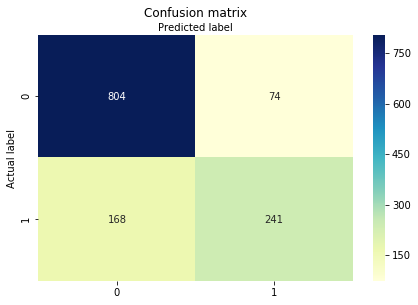

In [14]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


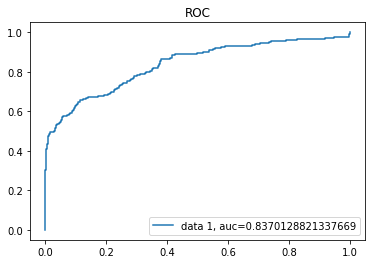

In [15]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.title('ROC')
plt.show()
